# Analysis of the effect n and k have on unwrapped phase

In [1]:
import numpy as np
import pandas as pd
import torch 
import matplotlib.pyplot as plt
from Model.back_prop_utils import H_th_function, round_to_sig_figs

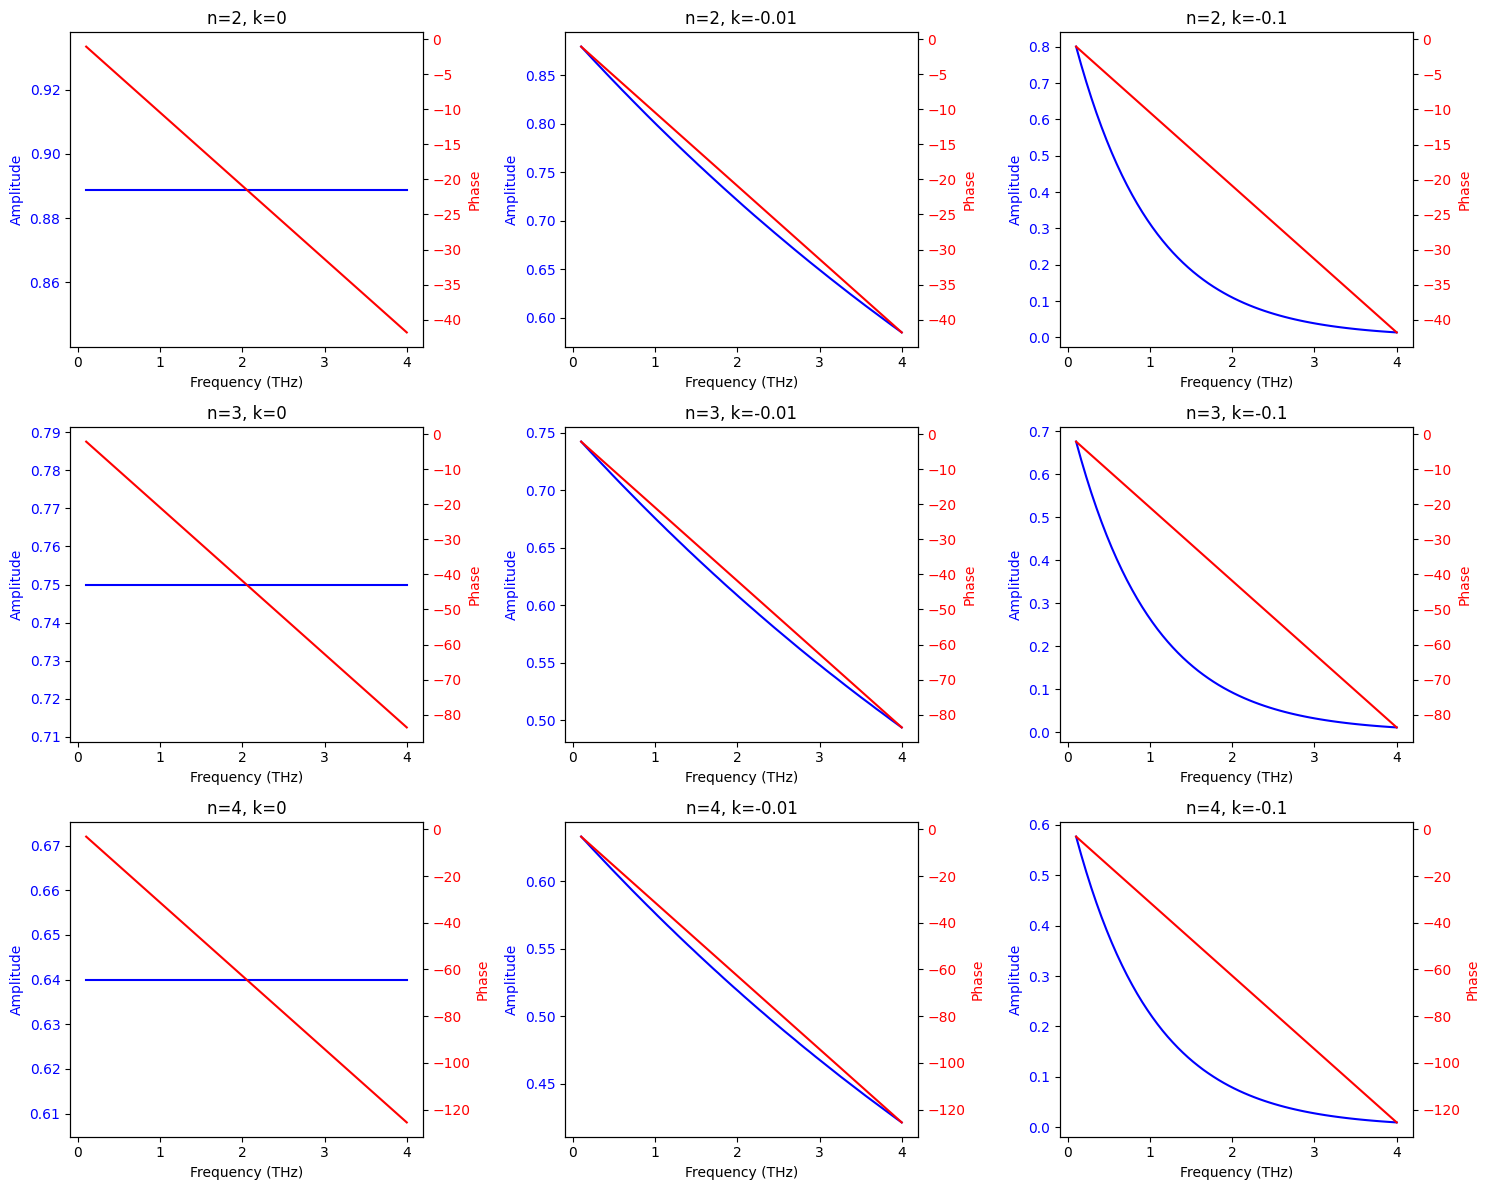

   n    k  Frequency (THz)  Amplitude     Phase
0  2  0.0         0.100000     0.8889 -1.045827
1  2  0.0         0.161905     0.8889 -1.693243
2  2  0.0         0.223810     0.8889 -2.340660
3  2  0.0         0.285714     0.8889 -2.988076
4  2  0.0         0.347619     0.8889 -3.635493


In [3]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter

# Fixed true values
n_vals = [2, 3, 4]
k_vals = [0, -0.01, -0.1]
d_true = 499e-6

# Frequency setup
no_freqs = 2**6
freqs_THz = np.linspace(0.1, 4, no_freqs)
freqs = freqs_THz * 1e12
freqs_ang = freqs * 2 * np.pi
w_tensor = torch.tensor(freqs_ang, dtype=torch.float32)

# Create an empty list to store the results
data = []

# Iterate over all combinations of n and k
for n_true in n_vals:
    for k_true in k_vals:
        # Generate synthetic experimental data
        tf_values = H_th_function((n_true + k_true * 1j), w_tensor, d_true)

        # Unwrap the phase and compute the amplitude
        H_values_clean = np.abs(tf_values).cpu().numpy()
        phi_values_clean = np.unwrap(np.angle(tf_values))

        # Store the results in the list
        for freq, amplitude, phase in zip(freqs_THz, H_values_clean, phi_values_clean):
            data.append({'n': n_true, 'k': k_true, 
                         'Frequency (THz)': freq, 
                         'Amplitude': amplitude, 
                         'Phase': phase})

# Create the DataFrame from the list
df = pd.DataFrame(data)

df["Amplitude"] = df["Amplitude"].apply(lambda x: round_to_sig_figs(x, sig_figs=4))


# Plotting: 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()  # Flatten to make it easier to index

# Plot each combination of n and k
for i, (n_true) in enumerate(n_vals):
    for j, (k_true) in enumerate(k_vals):
        ax = axes[i * 3 + j]
        
        # Extract the results for the current n and k
        subset = df[(df['n'] == n_true) & (df['k'] == k_true)]
        
        # Plot the amplitude (absolute value) on the left y-axis
        ax.plot(subset['Frequency (THz)'], subset['Amplitude'], 'b-', label='Amplitude')
        ax.set_xlabel('Frequency (THz)')
        ax.set_ylabel('Amplitude', color='b')
        ax.tick_params(axis='y', labelcolor='b')

        # Create a second y-axis for the phase
        ax2 = ax.twinx()
        ax2.plot(subset['Frequency (THz)'], subset['Phase'], 'r-', label='Phase')
        ax2.set_ylabel('Phase', color='r')
        ax2.tick_params(axis='y', labelcolor='r')

        # Add a label for the current n and k combination
        ax.set_title(f'n={n_true}, k={k_true}')

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

# Optionally, display the first few rows of the dataframe to check the results
print(df.head())

In [3]:
# Extract a k = 0 case and find variance
k_0_case = df[(df['n'] == 3) & (df['k'] == 0)]

In [ ]:
plt.plot(k_0_case['Frequency (THz)'], k_0_case['Amplitude'])

In [ ]:
k_0_case = np.array(k_0_case['Amplitude'])
np.var(k_0_case)